<a href="https://www.kaggle.com/code/sankalpkhavale/data-analysis-on-amazon-product-listings-october?scriptVersionId=114043687" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #Ignore the warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-india-product-listings-october-2020/Amazon Product Listings October 2020 Train.csv
/kaggle/input/amazon-india-product-listings-october-2020/Amazon Product Listings October 2020 Test.csv


# Reading Dataset

In [2]:
df=pd.read_csv('/kaggle/input/amazon-india-product-listings-october-2020/Amazon Product Listings October 2020 Train.csv')
df.head(2)

,Unique ID,Date,Time Stamp,Site Name,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility,Image Urls,Purchases
0,f0b68a06debc9253226d6a029b065f38,09-10-2020,04:48:39,Amazon In,Make up,Homely 100pcs/bag Japan Rough Triangle Metal ...,"Item Type: Rhinestone & Decoration, Weight: 5g...",Homely,NaN,1017.0,678.0,33.33%,NaN,YES,https://images-na.ssl-images-amazon.com/images...,49.0
1,3100ab4692077d37b288e1e2da1bb601,09-10-2020,08:09:29,Amazon In,Make up,Fashlady™ F019: 2 Folhas De Lavanda Flor Etiq...,"Tipo de item: adesivo & decalque, estilo: flow...",FashladyTM,NaN,1949.0,1299.0,33.35%,NaN,YES,https://images-na.ssl-images-amazon.com/images...,22.0


This dataset contains all the details regarding Amazon India Products in and their Purchases in October 2020. This dataset  holds around 30K records.

    Unique ID             : Unique ID of the product
    Date                  : The Date of the purchase
    Time Stamp            : The time of Purchases
    Site Name             : The name of the site from where the crawl has been taken from
    Category              : The category of the product that is present in this dataset
    Product Title         : The title of the product that is available
    Product Description   : The description of the product that is available
    Brand                 : The name of the brand of the product    
    Pack Size Or Quantity : The size of the packet that the product comes in
    Mrp                   : The MRP of the product in the website
    Price                 : The price at which it is sold on amazon
    Offers                : Offer is calculated using Mrp & Price
    Combo Offers          : Help you with any Combo offer avaiable for that product
    Stock Availibility    : Stock Availible fo that product
    Image Urls            : Image Url for that product
    Purchases             : The amount of purchases of the product
    
Based on our observations we will be drawing insights and framing different sets of
questions.

In [3]:
df.shape

(30000, 16)

    We are using the shape attributes to get know how many Rows and Columns we have in our Dataset. From mhich we can conclude that it has 30000 rows and 16 columns.

In [4]:
#for finding countionus Data
df.describe()

,Mrp,Price,Purchases
count,25530.000000,25559.000000,25999.000000
mean,2547.666541,1956.150188,28.820416
std,3132.067982,2068.645083,16.347306
min,9.000000,7.000000,1.000000
25%,701.000000,595.000000,15.000000
50%,1578.000000,1216.000000,29.000000
75%,3201.000000,2494.000000,43.000000
max,186616.000000,10925.000000,57.000000


    From the describe attributes we can coclude that my Mrp, Price, Purchases columns have continous data where Mrp columns have 25530 values where Purchases and Price column have 25999 values.

In [5]:
df.index

RangeIndex(start=0, stop=30000, step=1)

In [6]:
df.columns

Index(['Unique ID', 'Date', 'Time Stamp', 'Site Name', 'Category',
       'Product Title', 'Product Description', 'Brand',
       'Pack Size Or Quantity', 'Mrp', 'Price', 'Offers', 'Combo Offers',
       'Stock Availibility', 'Image Urls', 'Purchases'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unique ID              25999 non-null  object 
 1   Date                   25999 non-null  object 
 2   Time Stamp             25999 non-null  object 
 3   Site Name              25999 non-null  object 
 4   Category               25981 non-null  object 
 5   Product Title          25978 non-null  object 
 6   Product Description    24706 non-null  object 
 7   Brand                  25708 non-null  object 
 8   Pack Size Or Quantity  5619 non-null   object 
 9   Mrp                    25530 non-null  float64
 10  Price                  25559 non-null  float64
 11  Offers                 25616 non-null  object 
 12  Combo Offers           27 non-null     object 
 13  Stock Availibility     25999 non-null  object 
 14  Image Urls             25978 non-null  object 
 15  Pu

    From the above information, It can be seen that there are multiple columns which have lots of null values and some columns are not in proper format, so we need to do perfomr some Cleaning to get desired analysis.

# Data Cleaning

In [8]:
#finding duplicate entryies...
df[df.duplicated()] 

,Unique ID,Date,Time Stamp,Site Name,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility,Image Urls,Purchases
26000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    As we can see there are 4000 columns which have duplicate and all of the value they contains are Null values and its notice that after 26000 till end its just blank reocrds which does not contain any records, So we need to remove them as they did not contain any data which are required us doing analysis.

In [9]:
#Removing duplicate entries...
df.drop_duplicates(inplace=True)

    Using the drop_duplicates function too remove the duplicate values from our Dataset for permanent basis.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 25999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unique ID              25999 non-null  object 
 1   Date                   25999 non-null  object 
 2   Time Stamp             25999 non-null  object 
 3   Site Name              25999 non-null  object 
 4   Category               25981 non-null  object 
 5   Product Title          25978 non-null  object 
 6   Product Description    24706 non-null  object 
 7   Brand                  25708 non-null  object 
 8   Pack Size Or Quantity  5619 non-null   object 
 9   Mrp                    25530 non-null  float64
 10  Price                  25559 non-null  float64
 11  Offers                 25616 non-null  object 
 12  Combo Offers           27 non-null     object 
 13  Stock Availibility     25999 non-null  object 
 14  Image Urls             25978 non-null  object 
 15  Pu

In [11]:
#removing unnessary columns
df.drop(columns=['Site Name','Image Urls','Unique ID','Product Description'],inplace=True)

    As you can see the Dulicate have been remove have and now we need to remove some unnessary columns which are not required for us while Analysis but we can see that the columns Date, Time Stamp and Offers have datatype as string. We need to alter the datattype of these columns to int/float to perform numeric operations on it.

In [12]:
#Converting Datetime column to proper type
#To startwith We need to concate the both columns into the one
Date_time = df['Date']+' '+df['Time Stamp']
Date_time

0        09-10-2020 04:48:39
1        09-10-2020 08:09:29
2        09-10-2020 12:01:44
3        17-10-2020 19:06:57
4        09-10-2020 01:19:29
                ...         
25995    09-10-2020 04:00:19
25996    18-10-2020 01:01:38
25997    18-10-2020 02:26:22
25998    09-10-2020 02:55:20
25999                    NaN
Length: 26000, dtype: object

In [13]:
#After merging columns we are inserting the merge columns at index no.2 and changing the columns name to Datetime
df.insert(loc = 2,
          column = 'Datetime',
          value = Date_time)
#df['Date_time']=Date_time
#df.head(2)

In [14]:
#after inserting our new merge columns we need to drop the exissting Date and Time column for better understang.
df.drop(columns=['Date','Time Stamp'],inplace=True) 

In [15]:
#now its time to convert the String date and time values into proper format and datatype as timeseries.
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M:%S')

In [16]:
#checking if its working
df.loc[(df['Datetime'].dt.day==17)].head(2)

,Datetime,Category,Product Title,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility,Purchases
3,2020-10-17 19:06:57,Bath & Shower,Fa Coconut Water Shower Gel - 250ml,Fa,499 g,595.0,495.0,16.81%,NaN,YES,45.0
9,2020-10-17 19:28:30,Fragrance,Parag Fragrances Cool Woman Spray Perfume 50m...,Parag fragrances,NaN,1000.0,699.0,30.10%,NaN,YES,29.0


    Finally we have convert all the string Date and time values into proper format so we can do analysis using it.

In [17]:
#let's Finding the null values
a=df.isnull().sum().reset_index()
a.columns=['Columns','Total null values per column']
a

,Columns,Total null values per column
0,Datetime,1
1,Category,19
2,Product Title,22
3,Brand,292
4,Pack Size Or Quantity,20381
5,Mrp,470
6,Price,441
7,Offers,384
8,Combo Offers,25973
9,Stock Availibility,1


    As you can see the columns 'Pack Size Or Quantity','Combo Offers' have more that 20k records are null from total 26k so we need to remove those two columns.

In [18]:
#as you can see [Pack Size Or Quantity,Combo Offers] have maximum null values
df.drop(columns=['Pack Size Or Quantity','Combo Offers'],inplace=True)
df.head(2)

,Datetime,Category,Product Title,Brand,Mrp,Price,Offers,Stock Availibility,Purchases
0,2020-10-09 04:48:39,Make up,Homely 100pcs/bag Japan Rough Triangle Metal ...,Homely,1017.0,678.0,33.33%,YES,49.0
1,2020-10-09 08:09:29,Make up,Fashlady™ F019: 2 Folhas De Lavanda Flor Etiq...,FashladyTM,1949.0,1299.0,33.35%,YES,22.0


In [19]:
#checking the Dataset and formatting column in a proper datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 25999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datetime            25999 non-null  datetime64[ns]
 1   Category            25981 non-null  object        
 2   Product Title       25978 non-null  object        
 3   Brand               25708 non-null  object        
 4   Mrp                 25530 non-null  float64       
 5   Price               25559 non-null  float64       
 6   Offers              25616 non-null  object        
 7   Stock Availibility  25999 non-null  object        
 8   Purchases           25999 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 2.0+ MB


In [20]:
#lets try to convert offers into to proper format in flaot with replacing % sign
df['Offers']=df['Offers'].str.replace('%','') #str cause there is special charcter $
df['Offers']=df['Offers'].astype(float)

    The columns name offers have string value too first we need to remove the percentile sign in every record and convert it string datatype to float Datatype and we are also going to change the column name from 'Offers' to 'Offers(%)' as the offers are in percentage so we can use this records and columns for alaysis of our dataset.

In [21]:
#changing the name of column
df.rename(columns={'Offers':'Offers(%)'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 25999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datetime            25999 non-null  datetime64[ns]
 1   Category            25981 non-null  object        
 2   Product Title       25978 non-null  object        
 3   Brand               25708 non-null  object        
 4   Mrp                 25530 non-null  float64       
 5   Price               25559 non-null  float64       
 6   Offers(%)           25616 non-null  float64       
 7   Stock Availibility  25999 non-null  object        
 8   Purchases           25999 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 2.0+ MB


In [22]:
#Checking dataset
df.head(3)

,Datetime,Category,Product Title,Brand,Mrp,Price,Offers(%),Stock Availibility,Purchases
0,2020-10-09 04:48:39,Make up,Homely 100pcs/bag Japan Rough Triangle Metal ...,Homely,1017.0,678.0,33.33,YES,49.0
1,2020-10-09 08:09:29,Make up,Fashlady™ F019: 2 Folhas De Lavanda Flor Etiq...,FashladyTM,1949.0,1299.0,33.35,YES,22.0
2,2020-10-09 12:01:44,Make up,Fashlady™ 1 Sheet Nailmad Diamond Heart Nail ...,FashladyTM,1949.0,1299.0,33.35,YES,12.0


    Our Data cleaning of the Dataset has been completed now
    LETS PERFORM ANALYSIS DRAWING CERTAIN INSIGHTS BASED ON THE QUESTIONS WE MAKE

In [23]:
#This dataset is loaded for 18 days of purchase..
print(df['Datetime'].max())
print(df['Datetime'].min())

2020-10-18 10:21:56
2020-10-01 22:53:48


This total Dataset is for 18 days of Oct month in year 2020...

# Data is Clean, Now time to Visualization

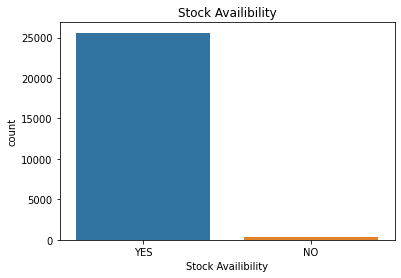

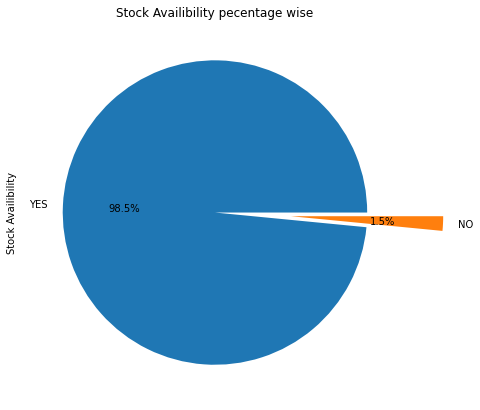

In [24]:
plt.title('Stock Availibility')
sns.countplot(data=df,x=df['Stock Availibility'])
plt.figure(figsize=(7,7))
plt.title('Stock Availibility pecentage wise')
df['Stock Availibility'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0,0.5))
plt.show()

    ________________________________________________________________________________________________________________________    
    Analysis : 
        From The above Data we can draw an inference that how stock has been loaded after the purchases, out of 26000 more than 25000 products sstock has been available to us. From the pie chart we can coclude that 98.5% stock is available and 1.5% stock is not loaded yet.
    _______________________________________________________________________________________________________________________

In [25]:
a=df['Category'].value_counts().reset_index()
a.columns=['Category Name','Total products as per category']
a

,Category Name,Total products as per category
0,Make up,9550
1,Skin Care,7664
2,Grocery & Gourmet Foods,4025
3,Hair Care,1329
4,Fragrance,884
5,Bath & Shower,864
6,Baby Bath & Hygiene,203
7,Baby | Diapering & Nappy Changing | Diaper Bags,187
8,Baby | Diapering & Nappy Changing | Diapers |...,159
9,Baby | Baby Care | Bathing | Bath Towels & Wa...,125


    ________________________________________________________________________________________________________________________
    Analysis:
        As you can see there are total 58 Categories within our Dataset where Make-up at top has total 9550 products and    Skin Care has 7664 products, Grocery & Gourmet Foods has 4025, Hair Care has 1329 products and Fragrance,Bath & Shower have more  than 800+ products.
    _______________________________________________________________________________________________________________________

In [26]:
df2=df[['Category','Purchases']]
a=df2.groupby(by='Category')
ans=a.sum().sort_values(by='Purchases',ascending=False).head(10).reset_index()
ans

,Category,Purchases
0,Make up,274095.0
1,Skin Care,220835.0
2,Grocery & Gourmet Foods,114924.0
3,Hair Care,38288.0
4,Fragrance,26583.0
5,Bath & Shower,25475.0
6,Baby Bath & Hygiene,6168.0
7,Baby | Diapering & Nappy Changing | Diaper Bags,5256.0
8,Baby | Diapering & Nappy Changing | Diapers |...,4687.0
9,Detergents & Dishwash,3636.0


    ________________________________________________________________________________________________________________________
    Analysis:
        We can see that the Make-up, Skin Care, Grocery & Gourmet Foods have good no. of purchases althhough they also have good no.of product within them which we can see from the above analysis as well so now lets make bar plot using it for  the better visual view.
    _______________________________________________________________________________________________________________________

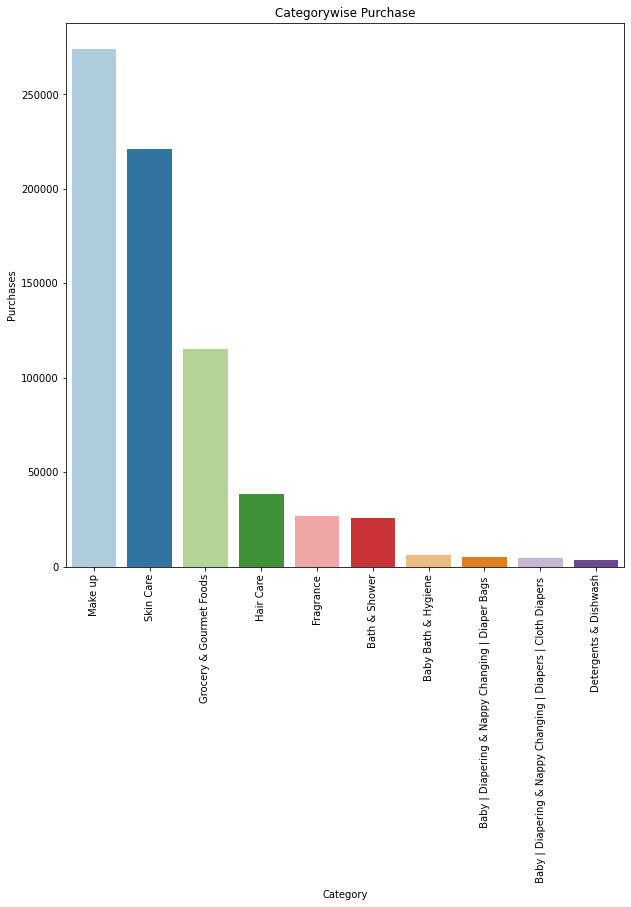

In [27]:
#Plotting bar chart for visual view for top10 purchases in Dataset
plt.figure(figsize = (10,10))
sns.barplot(y=ans['Purchases'],x=ans['Category'],orientation='vertical',palette='Paired')
plt.title('Categorywise Purchase')
plt.xticks(rotation=90)
plt.show()

    ________________________________________________________________________________________________________________________
    Analysis : 
        We have good qunatity of product avaiable for Category Make-up, Skin care, Grocery and using bar plot we get a good view of our dataset and category wise purchases for top 10 Category.
    ________________________________________________________________________________________________________________________

In [28]:
#Similarly finding the total brands
#a=df['Brand'].value_counts()
#print(a,end='\n\n')
#print(f'>>>There are total {len(a)} Brands within Dataset')

a=df['Brand'].value_counts().reset_index()
a.columns=['Category Name','Total products as per Brand']
a

,Category Name,Total products as per Brand
0,FashladyTM,4138
1,Generic,3181
2,FARMERLY,830
3,CHOCOCRAFT,794
4,Veena,729
...,...,...
5617,YUTIRITI,1
5618,PureSouth+Naturals,1
5619,Naturobell,1
5620,Dead Sea Essentials,1


    ________________________________________________________________________________________________________________________
    Analysis:
        As you can see there are total 5622 Brand within our Dataset where FashladyTM at top has total 4138 products and    Generic has 3181 products, FARMERLY has 4025, CHOCOCRAFT has 1329 products and Veena, Homely, SFU E Com have more than   800+ products.
    _______________________________________________________________________________________________________________________

In [29]:
df3=df[['Brand','Purchases']]
a1=df3.groupby(by='Brand')
ans1=a1.sum().sort_values(by='Purchases',ascending=False).head(10).reset_index()
ans1

,Brand,Purchases
0,FashladyTM,118391.0
1,Generic,91660.0
2,FARMERLY,23395.0
3,CHOCOCRAFT,23110.0
4,Veena,21384.0
5,Homely,18259.0
6,SFU E Com,15303.0
7,"Fashladyâ""¢",8656.0
8,sensadore,8165.0
9,Chocholik,7620.0


    ________________________________________________________________________________________________________________________
    Analysis:
        We can see that the Fashlady TM and Generic have good no. of purchases althhough they also have good no.of product         within them which we can see from the above analysis as well so now lets make horizontal bar plot using it for the      better visual view.
    _______________________________________________________________________________________________________________________

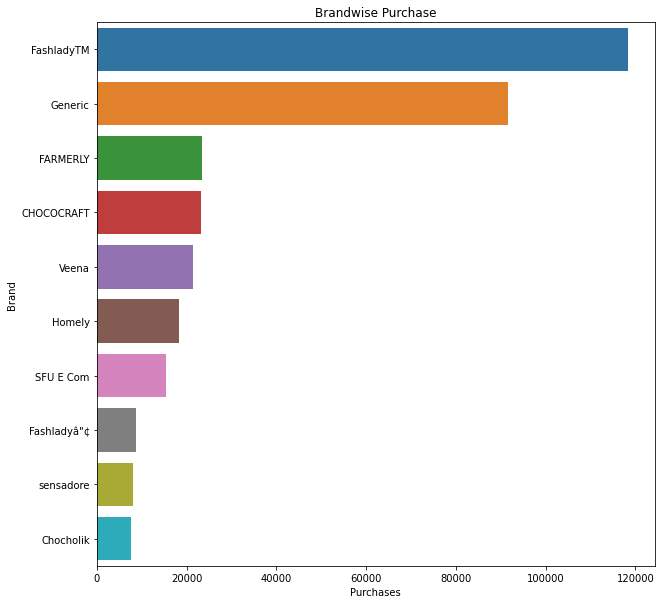

In [30]:
plt.figure(figsize = (10,10))
sns.barplot(x=ans1['Purchases'],y=ans1['Brand'])
plt.title('Brandwise Purchase')
plt.show()

    _____________________________________________________________________________________________________________________
    Analysis : 
        We have brought good quantity of products with brand name FashladyTM, Generic, Farmerly, Chococraft and using bar plot we get a good view of our dataset and Brand wise purchases for top 10 Brands.
    ________________________________________________________________________________________________________________________

Q6) Find the Offer frequency for the Dataset?

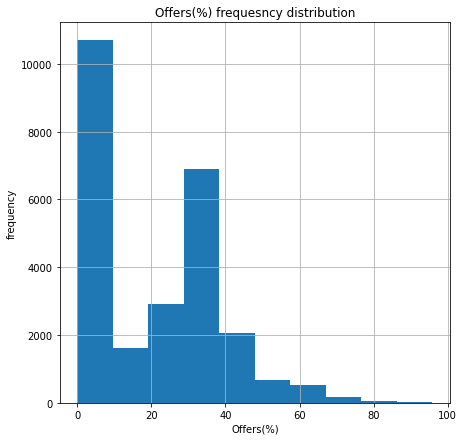

In [31]:
#Checking Offer frequency
#Offers distribution
#price_mean=df['Offers(%)'].mean()
#price_median=df['Offers(%)'].median()

plt.figure(figsize=(7,7))
plt.hist(df['Offers(%)'],bins=10) #plt.hist(), bins=
#plt.axvline(price_mean,color='red')
#plt.axvline(price_median,color='yellow')
plt.title('Offers(%) frequesncy distribution')
plt.ylabel('frequency')
plt.xlabel('Offers(%)')
plt.grid(True)

#price_mean,price_median
#we can see the frequency of distribution of offers(%)..

    _____________________________________________________________________________________________________________________
    Analysis : 
        From the above histogram for the offer, we can conclude that for more than 6000 products we have 20-40% offers likewise. however some of the products do have almost 60% to 80% off. We can also see that from above histogram 10000+ products have less than 10% off.
    ________________________________________________________________________________________________________________________

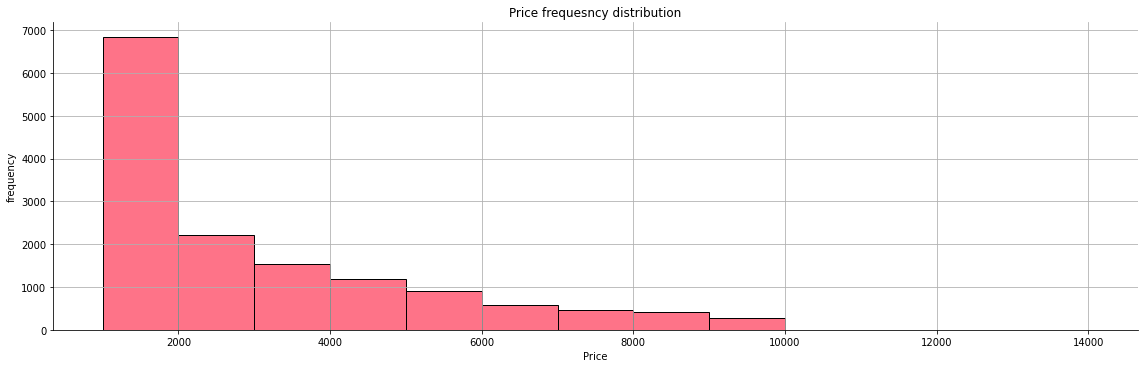

In [32]:
#checking the same for Price using Displot

sns.displot(df['Price'],bins=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000], aspect=3.2,color='#fe4460')
plt.title('Price frequesncy distribution')
plt.ylabel('frequency')
plt.xlabel('Price')
plt.grid(True)

plt.show()

    _____________________________________________________________________________________________________________________
    Analysis : 
        From the above Displot for the prize, we can conclude are almost 7000 products which are under 2000₹ and its is      decresing as the prize is increased. In our Datset there are less products which costly i.e more than amount of 5000₹ so we conclude that the product within our Dataset are cheap but more quantity.
    ________________________________________________________________________________________________________________________

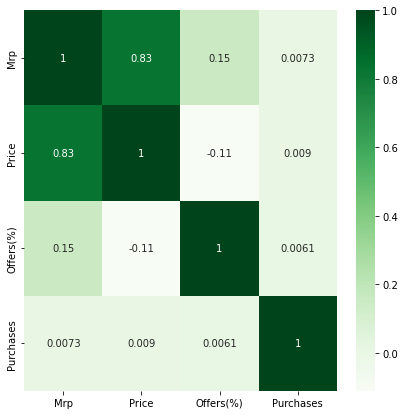

In [33]:
#checking If there is any co-relnation using Heat-map
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap="Greens")
plt.show()

    _____________________________________________________________________________________________________________________
    Analysis : 
        As per the Heatmap if the number is near to +1 than its positive co-reln, if the number is -1 than its negative co-reln and if the number is equal to 0.0 or 0.1 than there is no co-reln between two variable. From the abive Heatmap we can see that Price and Mrp columns are almost near to postive co-reln, now lets try to visualize it using the scatterplot.
    ________________________________________________________________________________________________________________________

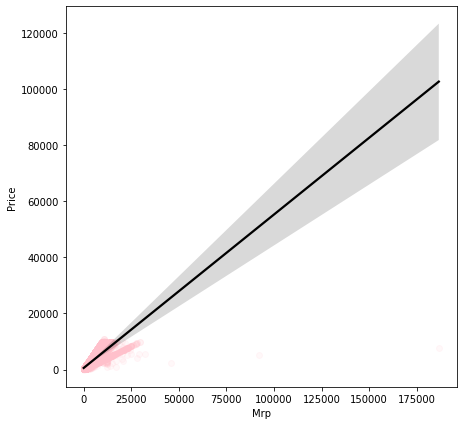

In [34]:
plt.figure(figsize=(7,7))
sns.regplot(x=df['Mrp'],y=df['Price'],scatter_kws={"color": "pink",'alpha':0.1},line_kws={"color": "black"})
#plt.axes()
#plt.scatter(df['Price'],df['Mrp'])
plt.show()

    _____________________________________________________________________________________________________________________
    Analysis : 
        As per the above Analyis we saw that ther might be postive co-reln between the Price and Mrp columns of our Dataset so we tried to plot them on scatterplot which say that there is postive co-reln between Mrp for which we brought the prodcuts and price we are selling on the website, which means if the Mrp of the product is high than the price we are selling on the website might be costly as well.
    ________________________________________________________________________________________________________________________

In [35]:
#Products with no offers and high prize
df.loc[(df['Offers(%)']==0) & (df['Price']>=5000)]

,Datetime,Category,Product Title,Brand,Mrp,Price,Offers(%),Stock Availibility,Purchases
6,2020-10-09 07:16:04,Skin Care,Philosopy Fresh cream Lip Polishing S...,Philosophy,5989.00,5989.00,0.0,YES,20.0
31,2020-10-18 00:19:24,Fragrance,Vanilla Premium Grade Fragrance Oil - Perfume...,P&J Trading,5237.46,5237.46,0.0,YES,44.0
46,2020-10-09 13:29:42,Skin Care,L.I.P. (Light/Day Palette) Mehron L.I.P Cream...,Mehron,7288.00,7288.00,0.0,YES,29.0
48,2020-10-18 06:27:33,Skin Care,"Hooriyas NovAge Ecollagen Skin Care Set, our ...",Hooriyas,9900.00,9900.00,0.0,YES,43.0
57,2020-10-09 07:39:40,Skin Care,Moisture Surge 72-Hour Auto-Replenishing Hydr...,Clinique,6005.97,6005.97,0.0,YES,7.0
...,...,...,...,...,...,...,...,...,...
25958,2020-10-17 17:57:30,Fragrance,Annick Goutal Grand Amour Eau De Toilette Spr...,Annick Goutal,10793.00,10793.00,0.0,YES,1.0
25967,2020-10-18 06:40:13,Skin Care,10pcs=5 packs High Quality Gold Crystal Colla...,Generic,6868.00,6868.00,0.0,YES,28.0
25977,2020-10-17 21:20:31,Hair Care,"Kiss My Face Whenever Conditioner, 325ml",Kiss My Face,5538.15,5538.15,0.0,YES,51.0
25986,2020-10-02 01:58:30,Baby | Diapering & Nappy Changing | Diapers |...,Alva Baby Reuseable Washable Pocket Cloth Dia...,ALVA,6637.00,6637.00,0.0,YES,49.0


    _____________________________________________________________________________________________________________________
    Analysis : 
        In our Dataset ther more than 1300 products which do not have any offer and have the high prize as well, which means that we are some products which are selling to the same price we have brought.
    ________________________________________________________________________________________________________________________

   Datetime  Purchases
0    Friday   367199.0
1    Sunday   193708.0
2  Saturday   167866.0
3  Thursday    11020.0
4   Tuesday     8836.0
5    Monday      673.0


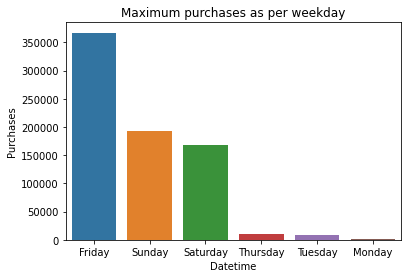

In [36]:
#Q9)Which day we have maximum purchases
df2=df[['Datetime','Purchases']]
df2['Datetime']=df2['Datetime'].dt.day_name()

a=df2.groupby(by='Datetime')
ans1=a.sum().sort_values(by='Purchases',ascending=False).reset_index()
print(ans1)

sns.barplot(x=ans1['Datetime'],y=ans1['Purchases'])
plt.title('Maximum purchases as per weekday')
plt.show()

    _____________________________________________________________________________________________________________________
    Analysis : 
        We have use the Barplot for each purchases for weekdays from which we can see that we brought more than 3lakh products on Friday following almost 2lakh products on Sunday and Saturday almost nothing on wednesday and Monday. 
    ________________________________________________________________________________________________________________________

In [37]:
#Q10)Total Mrp 
print('The total amount we have spend on products is',(df['Mrp']*df['Purchases']).sum(),'₹')

#Q10)Total price 
print('The total price at which we might sell on Webiste is',(df['Price']*df['Purchases']).sum(),"₹")

The total amount we have spend on products is 1883601498.06 ₹
The total price at which we might sell on Webiste is 1448367417.8 ₹


    _____________________________________________________________________________________________________________________
    Analysis : 
    The total amount we have spend on products is ₹ One Arab Eighty Eight Crore Thirty Six Lakh One Thousand Four Hundred Ninety Eight Rupees (one billion eight hundred eighty-three million six hundred one thousand four hundred ninety-eight) 
    & The total price at which we might sell on Webiste is ₹ One Arab Forty Four Crore Eighty Three Lakh Sixty Seven Thousand Four Hundred Seventeen Rupees(one billion four hundred forty-eight million three hundred sixty-seven thousand four hundred seventeen)
________________________________________________________________________________________________________________________

Extra Questions for practice

        Brand  Offers(%)
0  FashladyTM       3959
1     Generic       1210
2    FARMERLY        769
3      Homely        480
4   SFU E Com        293


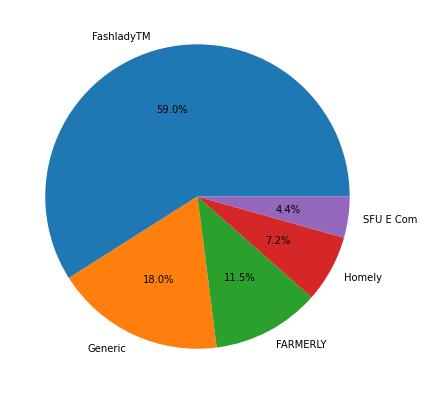

In [38]:
#Q1)Top 5 Brands for which we have offers more than 30%
z=df[['Brand','Offers(%)']].loc[df['Offers(%)']>=30]
ans2=z.groupby(by='Brand')

piei=ans2.count().sort_values(by='Offers(%)',ascending=False).head().reset_index()
print(piei)

plt.figure(figsize=(7,7))
plt.pie(piei['Offers(%)'],labels=piei['Brand'],autopct='%1.1f%%')
plt.show()

                  Category  Offers(%)
0                  Make up       5760
1                Skin Care       2336
2  Grocery & Gourmet Foods        733
3                Fragrance        272
4                Hair Care        247


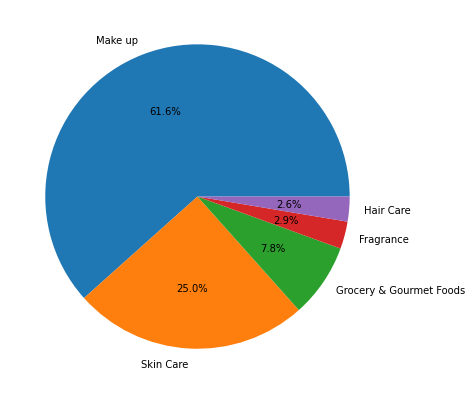

In [39]:
#Q2)Top 5 Category for which we have offers more than 30%
z=df[['Category','Offers(%)']].loc[df['Offers(%)']>=30]
ans2=z.groupby(by='Category')

piei=ans2.count().sort_values(by='Offers(%)',ascending=False).head().reset_index()
print(piei)

plt.figure(figsize=(7,7))
plt.pie(piei['Offers(%)'],labels=piei['Category'],autopct='%1.1f%%')
plt.show()

In [40]:
#Q3)Which product have the Highest MRP?
df.loc[df['Mrp']==(df['Mrp'].max())]               

,Datetime,Category,Product Title,Brand,Mrp,Price,Offers(%),Stock Availibility,Purchases
13654,2020-10-17 17:54:21,Skin Care,"Perricone MD Neuropeptide Night Cream, 2.5 Ou...",Perricone MD,186616.0,7683.84,95.88,YES,8.0


In [41]:
#Q4)Which product have the maximum offer 
df.loc[df['Offers(%)']==(df['Offers(%)'].max())]

,Datetime,Category,Product Title,Brand,Mrp,Price,Offers(%),Stock Availibility,Purchases
13654,2020-10-17 17:54:21,Skin Care,"Perricone MD Neuropeptide Night Cream, 2.5 Ou...",Perricone MD,186616.0,7683.84,95.88,YES,8.0


In [42]:
#Q5)Products which have good offers but stock is not avaiable
df.loc[(df['Offers(%)']>=30) & (df['Stock Availibility']=='NO')]

,Datetime,Category,Product Title,Brand,Mrp,Price,Offers(%),Stock Availibility,Purchases
7210,2020-10-18 05:13:37,Grocery & Gourmet Foods,Jaipuri Shop Mix Assorted Chocolate 200Gm wit...,Jaipuri Shop,1699.0,699.0,58.86,NO,29.0
7236,2020-10-18 00:44:57,Skin Care,Hollywood Secrets 100% Organic Senna Leaf Pow...,Hollywood Secrets,450.0,300.0,33.33,NO,2.0
7275,2020-10-09 02:00:15,Make up,"Fashlady™ Clear, China: 50Pcs Disposable Make...",FashladyTM,1913.0,1275.0,33.35,NO,55.0
7276,2020-10-18 00:44:34,Skin Care,Natural Henna/Heena Leaves Powder (LAWSONIA I...,VIKRAMSALES,329.0,149.0,54.71,NO,57.0
7280,2020-10-09 13:57:14,Make up,Generic FingrAngleVL10: 1 Pc 12*6cm Rectangle...,Generic,1194.0,796.0,33.33,NO,22.0
7281,2020-10-09 04:51:49,Make up,Fashlady™ 10 Root 12Mm 01: 10/20 Root 0.07/0....,FashladyTM,1949.0,1299.0,33.35,NO,22.0
7282,2020-10-17 16:48:42,Hair Care,Meenamart Hair Straightener 817,Meenamart,1399.0,535.0,61.76,NO,28.0
7283,2020-10-09 12:07:14,Make up,Fashlady™ As The Picture Show: 1 Box Starry H...,FashladyTM,1949.0,1299.0,33.35,NO,12.0
7286,2020-10-09 01:14:59,Make up,Saiyam Salon Express Nail Polish Art Decorati...,Saiyam,399.0,259.0,35.09,NO,37.0
7288,2020-10-09 08:22:00,Skin Care,Homely Waist Corsets Neoprene Slimming Body S...,Homely,7695.0,5130.0,33.33,NO,11.0


In [43]:
#Q6) Help me with the name of products which amount of purchases are high(more than 50) but stock not available
df[['Brand','Category','Product Title']].loc[(df['Purchases']>=50) & (df['Stock Availibility']=='NO')]

,Brand,Category,Product Title
144,Veena,Make up,Veena Pro 2015 Pcs Eye Makeup Brushes Set Fou...
223,Veena,Make up,Veena 02Gbox Aurora Chameleon Nail Art Glitte...
725,Veena,Make up,Veena Glaryyears 1 Sheet Mysterious Nail Stic...
930,Veena,Make up,Veena 7 Pcs Mermaid Makeup Brushes Set Foudat...
2070,Veena,Make up,Veena Maange 22Pcs Makeup Brush Profesional F...
...,...,...,...
23750,Veena,Make up,Veena 6 Jarsset Three-Dimensional 3Mm Chamele...
25199,Veena,Make up,Veena 18 Pcs Makeup Brushes Set Tools Profess...
25623,Veena,Make up,Veena Professional 7Pcs Makeup Brush Set Tool...
25734,SFU E Com,Grocery & Gourmet Foods,Swastik Rakhi with Chocolates | Rakhi Chocola...


In [44]:
#Q7)Which product have the Highest price
df.loc[df['Price']==(df['Price'].max())]  

,Datetime,Category,Product Title,Brand,Mrp,Price,Offers(%),Stock Availibility,Purchases
24012,2020-10-18 01:02:50,Skin Care,"Blackhead Remover,B-YASS USB Rechargeable Bla...",NaN,10925.0,10925.0,0.0,YES,17.0


   Datetime  Purchases
0       1.0    10946.0
1       2.0    25972.0
2       5.0      673.0
3       6.0     8836.0
4       8.0       74.0
5       9.0   341227.0
6      10.0     1275.0
7      17.0   166591.0
8      18.0   193708.0


Text(0.5, 0, '1 to 18 Oct 2020')

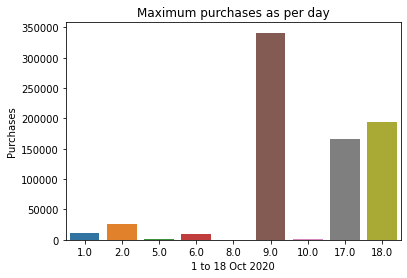

In [45]:
#maxi=df['Purchases'].max()
#a=df['Datetime'].loc[df['Purchases']==maxi].dt.day_name()
#a.unique()

#Q8)Which date we have maximum purchases

df2=df[['Datetime','Purchases']]
df2['Datetime']=df2['Datetime'].dt.day

a=df2.groupby(by='Datetime')
ans1=a.sum().sort_values(by='Datetime').reset_index()
print(ans1)

sns.barplot(x=ans1['Datetime'],y=ans1['Purchases'])
plt.title('Maximum purchases as per day')
plt.xlabel('1 to 18 Oct 2020')

# -----------------------------Thank you------------------------------